<a href="https://colab.research.google.com/github/juyounLee/DeepLearningZeroToAll_TF2./blob/main/03_1_Linear_Regression_and_Minimizing_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Cost Function in Python

In [2]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

def cost_func(W, x, y):
  cost = 0
  for i in range(len(x)):
    cost += (W*x[i]-y[i])**2
  return cost/len(x)

for feed_w in np.linspace(-3, 5, num=15):
  cost = cost_func(feed_w, x, y)
  print('{:6.3f} | {:10.5f}'.format(feed_w, cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### Const Function in Tensorflow

In [3]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

cost = []
w_values = np.linspace(-3, 5, num=15)

def cost_func(W, x, y):
  cost = tf.multiply(W, x) - y
  cost = tf.multiply(cost, cost)
  cost = tf.reduce_mean(cost)
  return cost

for feed_w in w_values:
  curr_cost = cost_func(feed_w, x, y)
  cost.append(curr_cost)
  print('{:6.3f} | {:10.5f}'.format(feed_w, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### Draw the graph

Text(0, 0.5, 'Cost')

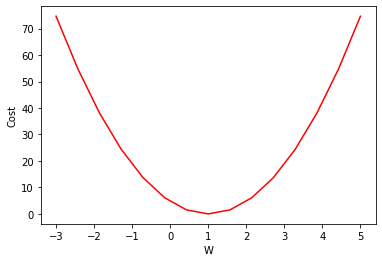

In [4]:
plt.plot(w_values, cost, 'r-')
plt.xlabel('W')
plt.ylabel('Cost')

### Gradient descent 구현

In [6]:
tf.random.set_seed(0) # for reproducibility

In [17]:
W = tf.Variable(tf.random.normal([1], -100., 100))
print(W)

a = 0.01

for i in range(300):
  cost = tf.reduce_mean(tf.square((W*x-y)))
  w_grad = tf.reduce_mean(tf.multiply((tf.multiply(W, x)-y), x))
  descent = W - tf.multiply(a, w_grad)
  W.assign(descent)

  if i%10 == 0:
    print('{:5} | {:8.3f} | {:10.5f}'.format(i, W.numpy()[0], cost))

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([124.84924], dtype=float32)>
    0 |  119.070 | 71580.29688
   10 |   74.213 | 27522.58008
   20 |   46.398 | 10582.41406
   30 |   29.150 | 4068.92993
   40 |   18.455 | 1564.50061
   50 |   11.824 |  601.54950
   60 |    7.712 |  231.29529
   70 |    5.162 |   88.93289
   80 |    3.581 |   34.19465
   90 |    2.600 |   13.14782
  100 |    1.992 |    5.05533
  110 |    1.615 |    1.94377
  120 |    1.382 |    0.74738
  130 |    1.237 |    0.28737
  140 |    1.147 |    0.11049
  150 |    1.091 |    0.04248
  160 |    1.056 |    0.01634
  170 |    1.035 |    0.00628
  180 |    1.022 |    0.00241
  190 |    1.013 |    0.00093
  200 |    1.008 |    0.00036
  210 |    1.005 |    0.00014
  220 |    1.003 |    0.00005
  230 |    1.002 |    0.00002
  240 |    1.001 |    0.00001
  250 |    1.001 |    0.00000
  260 |    1.000 |    0.00000
  270 |    1.000 |    0.00000
  280 |    1.000 |    0.00000
  290 |    1.000 |    0.00000


In [18]:
# predict
print(W*2.5)
print(W*5.)

tf.Tensor([2.5001838], shape=(1,), dtype=float32)
tf.Tensor([5.0003676], shape=(1,), dtype=float32)
